**LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('insurance_data.csv') 
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


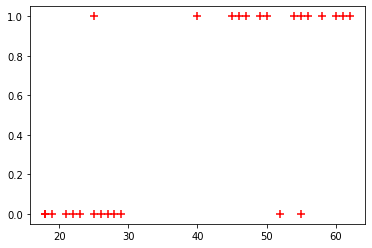

In [84]:
plt.scatter(df['age'],df['bought_insurance'],marker='+',color='red',s = 50) 


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


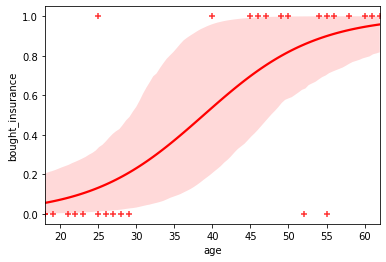

In [ ]:
sns.regplot(x='age', y='bought_insurance', data=df, logistic=True ,marker='+',color='red')

In [ ]:
X = df['age'].values.reshape(-1, 1)

In [ ]:
y = df['bought_insurance'].values.reshape(-1 , 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 12 , test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test

array([[60],
       [18],
       [21],
       [26],
       [25],
       [49]])

In [ ]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1]])

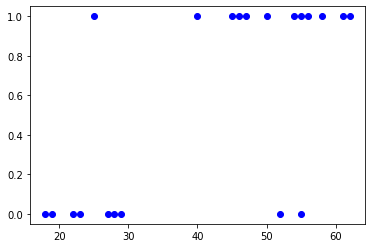

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


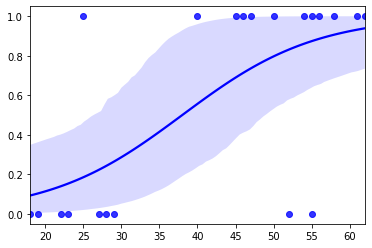

In [ ]:
sns.regplot(X_train, y_train, data=df, logistic=True ,color='blue')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 1])

In [ ]:
y_test         

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1]])

y_pred and y_test are equal .... accuracy will be 1

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
model.predict_proba(X_test)      ##predicts probability of data points on the basis of output variable

array([[0.07579537, 0.92420463],
       [0.9065016 , 0.0934984 ],
       [0.87333268, 0.12666732],
       [0.79618069, 0.20381931],
       [0.81400161, 0.18599839],
       [0.22253675, 0.77746325]])

In [ ]:
model.predict([[25],[50]])

array([0, 1])

In [ ]:
X_newtest = ([[10],[54],[80],[25],[60.2362]])

In [ ]:
model.predict(X_newtest)

array([0, 1, 1, 0, 1])

In [ ]:
y_new = model.predict(X_newtest)

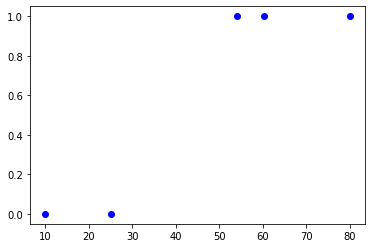

In [ ]:
plt.scatter(X_newtest, y_new, color = 'blue')

**SIGMOID FUNCTION** 

***What is the Sigmoid Function?***
 
It is a mathematical function having a characteristic that can take any real value and map it to between 0 to 1 shaped like the letter “S”. The sigmoid function also called a logistic function.



---


Formula


> Y = 1 / 1+e -z



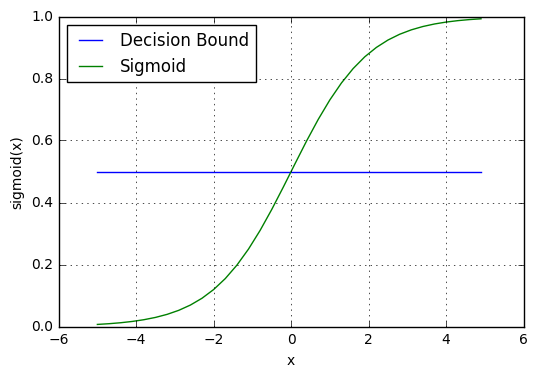

In [77]:
model.coef_                 ## model.coef_ indicates value of m in y=m*x + b equation

array([[0.11363202]])

In [78]:
model.intercept_           ## model.intercept_ indicates value of b in y=m*x + b equation

array([-4.31702478])

In [79]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [80]:
def prediction_function(age):
    z = 0.042 * age - 1.53                   ## 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [81]:
age = 35
prediction_function(age)

0.4850044983805899

0.485 is less than 0.5 which means person with 35 age will ***not*** buy insurance

In [82]:
age = 73
prediction_function(age)

0.8228824903813157

0.8228 is greater than 0.5 which means person with 35 age will  **buy** insurance